In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

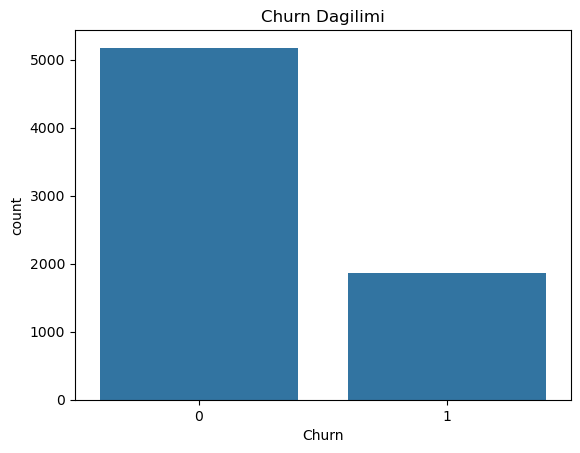

In [9]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Dagilimi")
plt.show()

In [10]:
churn_rate = df['Churn'].value_counts(normalize=True)
print("Churn oranı:\n", churn_rate)

Churn oranı:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [11]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
for col in df.columns:
    print(f"column name: {col} ////// column type: {df[col].dtype}")

column name: customerID ////// column type: object
column name: gender ////// column type: object
column name: SeniorCitizen ////// column type: int64
column name: Partner ////// column type: object
column name: Dependents ////// column type: object
column name: tenure ////// column type: int64
column name: PhoneService ////// column type: object
column name: MultipleLines ////// column type: object
column name: InternetService ////// column type: object
column name: OnlineSecurity ////// column type: object
column name: OnlineBackup ////// column type: object
column name: DeviceProtection ////// column type: object
column name: TechSupport ////// column type: object
column name: StreamingTV ////// column type: object
column name: StreamingMovies ////// column type: object
column name: Contract ////// column type: object
column name: PaperlessBilling ////// column type: object
column name: PaymentMethod ////// column type: object
column name: MonthlyCharges ////// column type: float64


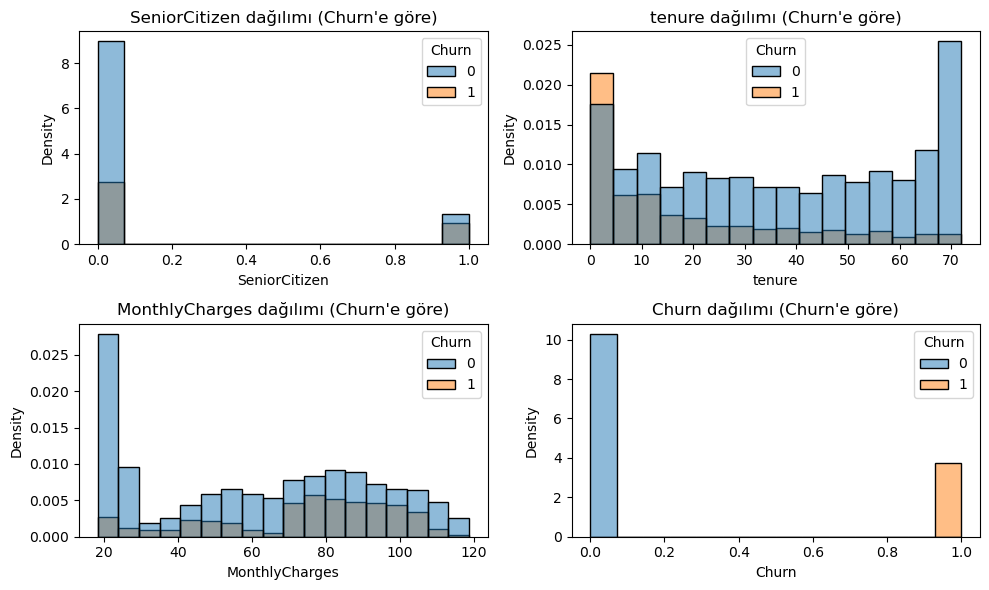

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2x2 grid ve toplam figür boyutu

# 2x2 matrisin düzleştirilmiş halini alıyoruz
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:4]):  # 2x2=4 plot olacak
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        kde=False,
        stat='density',
        ax=axes[i]  # her subplot’u kendi eksenine çizdiriyoruz
    )
    axes[i].set_title(f"{col} dağılımı (Churn'e göre)")

plt.tight_layout()
plt.show()

In [17]:
categorical_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [22]:
print(type(categorical_cols))

<class 'pandas.core.indexes.base.Index'>


In [25]:
categorical_cols = categorical_cols.drop('customerID')

In [15]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

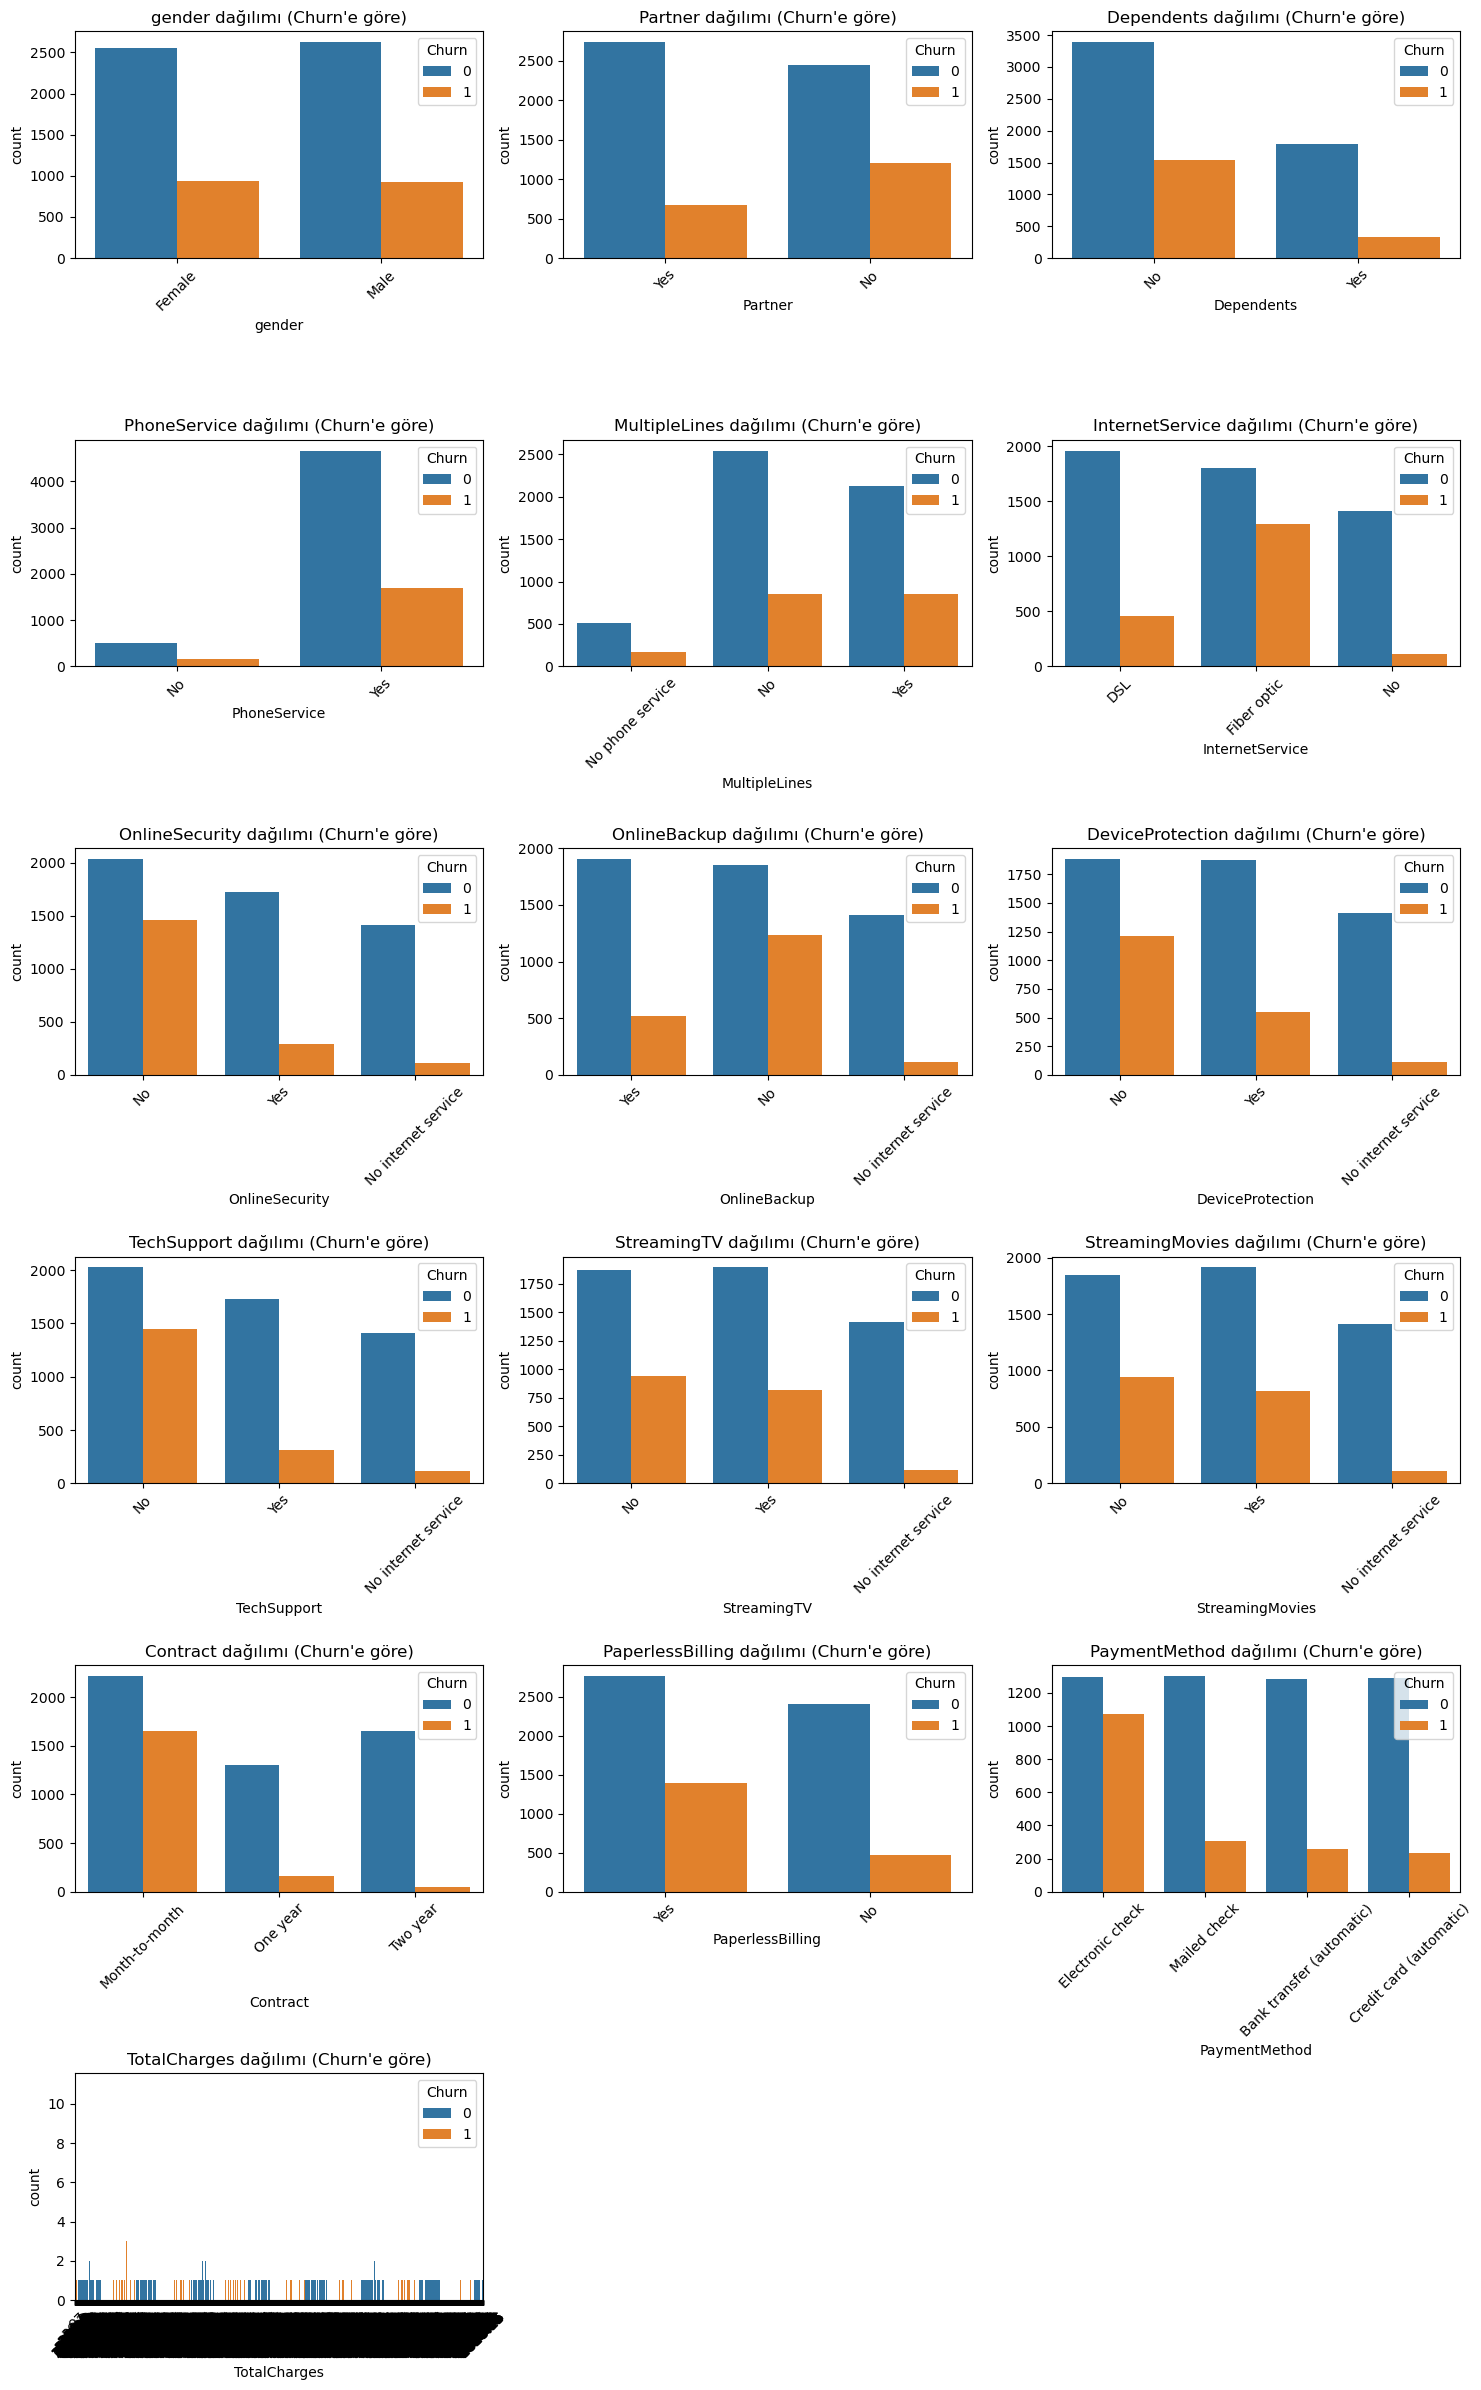

In [33]:
import math
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Ekseni düzleştir (bazı gridler boş kalabilir)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f"{col} dağılımı (Churn'e göre)")
    axes[i].tick_params(axis='x', rotation=45)

# Eğer bazı eksenler boş kaldıysa, onları kapatalım
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!!!! NEXT TASK: MAKE THESE PLOTS NEXT TO NEXT SO THEY DONT INVADE MUCH SPACE